In [1]:
import torch 
import torch.nn as nn
import numpy as np

KeyboardInterrupt: 

In [ ]:
def cross_entropy_loss(actual, prediction):
    loss=-1*(np.sum(actual*np.log(prediction)))
    
    return loss

In [ ]:
Y=np.array([1,0,0])
y_pred1=np.array([0.8,0.14,0.06])
y_pred2=np.array([0.51,0.489,0.01])

In [ ]:
cross_entropy_loss(Y,y_pred1)

0.2231435513142097

In [ ]:
cross_entropy_loss(Y,y_pred2)

0.6733445532637656

In [ ]:
loss=nn.CrossEntropyLoss()

In [ ]:
Y=torch.tensor([1])
# lets say 3 classes 0,1,2
y_pred1=torch.tensor([[2,1.7,1]])  # before softmax values 
y_pred2=torch.tensor([[1,3,2.2]])  # before softmax values

In [ ]:
loss(y_pred1,Y)

tensor(1.0461)

In [ ]:
loss(y_pred2,Y)

tensor(0.4604)

#### feed forward neural network

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt 
from tqdm import tqdm

In [3]:
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
### MNIST data
train_dataset=torchvision.datasets.MNIST(root="D:/machine learning/torch_learnings/data",train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root="D:/machine learning/torch_learnings/data",train=True,transform=transforms.ToTensor(),download=True)

In [5]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
len(train_dataset)

60000

In [7]:
transform = transforms.ToPILImage()

In [8]:
print(train_dataset[0][1])
transform(train_dataset[0][0])

5


In [9]:
print(train_dataset[0][0].shape,train_dataset[0][1])

torch.Size([1, 28, 28]) 5


In [10]:
batch_size=100

In [11]:
traindata_batches=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
testdata_batches=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [12]:
example=iter(traindata_batches)
sample_x,sample_y=next(example)
print(sample_x.shape,sample_y.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


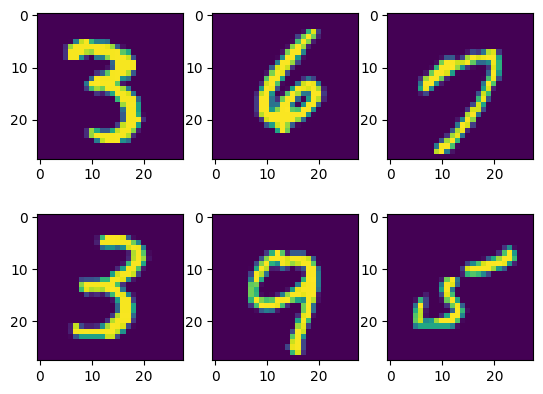

In [13]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(sample_x[i+50][0])
plt.show()

In [14]:
input_dimension=784 # 28*28 image
hidden_states= 100
num_classes=10
learning_rate=0.001
no_epochs=10

In [15]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(NeuralNet,self).__init__()
        self.l1=nn.Linear(input_size,hidden_size)
        self.l2=nn.ReLU()
        self.l3=nn.Linear(hidden_size,output_size)
    def forward(self,x):
        output1=self.l1(x)
        output2=self.l2(output1)
        output3=self.l3(output2)
        return output3
    

In [16]:
model=NeuralNet(
    input_size=input_dimension,
    hidden_size=hidden_states,
    output_size=num_classes
).to(device)

In [17]:
loss=nn.CrossEntropyLoss()

In [18]:
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [21]:
for epochs in tqdm(range(no_epochs)):
    for i,(x,y) in enumerate(traindata_batches):
        X=x.reshape(-1,28*28).to(device)
        Y=y.to(device)

        ### forward
        y_pred=model(X)
        l=loss(y_pred,Y)

        ### backward
        l.backward()
        optimizer.step()
        optimizer.zero_grad()


        if (i+1)%50==0:
            print(f"{epochs}/{no_epochs}  |  {i+1}/{len(traindata_batches) }  | {l.item():.4f}")



  0%|          | 0/10 [00:00<?, ?it/s]

0/10  |  50/600  | 0.2451
0/10  |  100/600  | 0.2916
0/10  |  150/600  | 0.3043
0/10  |  200/600  | 0.2636
0/10  |  250/600  | 0.4216
0/10  |  300/600  | 0.2667
0/10  |  350/600  | 0.2536
0/10  |  400/600  | 0.1742
0/10  |  450/600  | 0.2804
0/10  |  500/600  | 0.1194
0/10  |  550/600  | 0.1807


 10%|█         | 1/10 [00:08<01:18,  8.72s/it]

0/10  |  600/600  | 0.2486
1/10  |  50/600  | 0.1990
1/10  |  100/600  | 0.1790
1/10  |  150/600  | 0.2319
1/10  |  200/600  | 0.2856
1/10  |  250/600  | 0.1200
1/10  |  300/600  | 0.1898
1/10  |  350/600  | 0.2752
1/10  |  400/600  | 0.3707
1/10  |  450/600  | 0.1076
1/10  |  500/600  | 0.1701
1/10  |  550/600  | 0.1364


 20%|██        | 2/10 [00:17<01:08,  8.60s/it]

1/10  |  600/600  | 0.1792
2/10  |  50/600  | 0.1294
2/10  |  100/600  | 0.1397
2/10  |  150/600  | 0.1330
2/10  |  200/600  | 0.2352
2/10  |  250/600  | 0.0855
2/10  |  300/600  | 0.1210
2/10  |  350/600  | 0.0711
2/10  |  400/600  | 0.0879
2/10  |  450/600  | 0.1205
2/10  |  500/600  | 0.1514
2/10  |  550/600  | 0.0664


 30%|███       | 3/10 [00:25<01:00,  8.65s/it]

2/10  |  600/600  | 0.0857
3/10  |  50/600  | 0.1213
3/10  |  100/600  | 0.0955
3/10  |  150/600  | 0.0535
3/10  |  200/600  | 0.1075
3/10  |  250/600  | 0.0527
3/10  |  300/600  | 0.0599
3/10  |  350/600  | 0.0846
3/10  |  400/600  | 0.0576
3/10  |  450/600  | 0.1333
3/10  |  500/600  | 0.1032
3/10  |  550/600  | 0.1731


 40%|████      | 4/10 [00:34<00:51,  8.66s/it]

3/10  |  600/600  | 0.0671
4/10  |  50/600  | 0.0511
4/10  |  100/600  | 0.1438
4/10  |  150/600  | 0.0543
4/10  |  200/600  | 0.1011
4/10  |  250/600  | 0.0848
4/10  |  300/600  | 0.0575
4/10  |  350/600  | 0.0338
4/10  |  400/600  | 0.0965
4/10  |  450/600  | 0.0818
4/10  |  500/600  | 0.0537
4/10  |  550/600  | 0.0622


 50%|█████     | 5/10 [00:43<00:43,  8.69s/it]

4/10  |  600/600  | 0.0663
5/10  |  50/600  | 0.0541
5/10  |  100/600  | 0.0234
5/10  |  150/600  | 0.0753
5/10  |  200/600  | 0.0347
5/10  |  250/600  | 0.0623
5/10  |  300/600  | 0.0601
5/10  |  350/600  | 0.0528
5/10  |  400/600  | 0.0471
5/10  |  450/600  | 0.0725
5/10  |  500/600  | 0.0903
5/10  |  550/600  | 0.0264


 60%|██████    | 6/10 [00:52<00:34,  8.69s/it]

5/10  |  600/600  | 0.0473
6/10  |  50/600  | 0.0923
6/10  |  100/600  | 0.0683
6/10  |  150/600  | 0.0598
6/10  |  200/600  | 0.0380
6/10  |  250/600  | 0.1397
6/10  |  300/600  | 0.0731
6/10  |  350/600  | 0.0515
6/10  |  400/600  | 0.0369
6/10  |  450/600  | 0.0710
6/10  |  500/600  | 0.0251
6/10  |  550/600  | 0.0514


 70%|███████   | 7/10 [01:00<00:26,  8.68s/it]

6/10  |  600/600  | 0.0658
7/10  |  50/600  | 0.0323
7/10  |  100/600  | 0.0435
7/10  |  150/600  | 0.0259
7/10  |  200/600  | 0.0404
7/10  |  250/600  | 0.0611
7/10  |  300/600  | 0.0417
7/10  |  350/600  | 0.0360
7/10  |  400/600  | 0.0232
7/10  |  450/600  | 0.0883
7/10  |  500/600  | 0.0342
7/10  |  550/600  | 0.0711


 80%|████████  | 8/10 [01:09<00:17,  8.66s/it]

7/10  |  600/600  | 0.0107
8/10  |  50/600  | 0.0260
8/10  |  100/600  | 0.0264
8/10  |  150/600  | 0.1392
8/10  |  200/600  | 0.0747
8/10  |  250/600  | 0.0151
8/10  |  300/600  | 0.0180
8/10  |  350/600  | 0.0132
8/10  |  400/600  | 0.0944
8/10  |  450/600  | 0.0331
8/10  |  500/600  | 0.1133
8/10  |  550/600  | 0.0655


 90%|█████████ | 9/10 [01:17<00:08,  8.63s/it]

8/10  |  600/600  | 0.0221
9/10  |  50/600  | 0.0593
9/10  |  100/600  | 0.0543
9/10  |  150/600  | 0.0415
9/10  |  200/600  | 0.0308
9/10  |  250/600  | 0.0254
9/10  |  300/600  | 0.0520
9/10  |  350/600  | 0.0103
9/10  |  400/600  | 0.0170
9/10  |  450/600  | 0.0498
9/10  |  500/600  | 0.0524
9/10  |  550/600  | 0.0701


100%|██████████| 10/10 [01:26<00:00,  8.64s/it]

9/10  |  600/600  | 0.0205


In [30]:
with torch.no_grad():
    n_correct=0
    n_samples=0
    for i,(x,y) in enumerate(testdata_batches):
        
        test_x=x.reshape(-1,28*28).to(device)
        
        test_y=y.to(device)
        output=model(test_x)
        
        _,prediction=torch.max(output,1)
        n_samples+=test_y.shape[0]
        n_correct+=(prediction==test_y).sum().item()

    accuracy=100*(n_correct/n_samples)
    print(f"accu : {accuracy}")




accu : 99.16166666666668
